import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [12]:
def borehole_plots(df, parameter, c):
    borehole_list = df["PointID"].unique()
    bh = 0
    fig, axes = plt.subplots(3, 4)
    fig.suptitle(f'Distribution of {parameter} by geological layers', size=30, x=0.5, y=0.92)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    sns.set(rc={"figure.figsize":(20, 27)})
    sns.set(font_scale=1) 
    for row in range(3):
        for col in range(4):
            if bh >= len(borehole_list):
                pass
            else:
                filtered_df = df[df["PointID"] == borehole_list[bh]]
                ax = sns.stripplot(data=filtered_df, x=parameter, y="Index", ax=axes[row, col], orient="h", color=c, 
                                   jitter=False, s=10, marker="D", linewidth=1, alpha=.1)
                ax = sns.boxplot(data=filtered_df, x=parameter, y="Index", ax=axes[row, col], orient="h", boxprops=dict(alpha=.7), linewidth=1, showfliers= False)
                ax.set_title(borehole_list[bh], size=16)
                ax.set_ylabel("Layers")
                bh += 1
                
def find_index(geo_df, bh, depth):
    try: 
        filtered_df = geo_df[geo_df["PointID"] == bh]
        bottom_depth = filtered_df["Depth"].iloc[-1]
        for index, row in filtered_df.iterrows():
            if depth >= row["Top depth"] and depth < row["Depth"]:
                ind = row["Index"]
            elif depth == bottom_depth:
                ind =  bottom_depth = filtered_df["Index"].iloc[-1]
                break
        return ind
    except Exception as e:
        print("find_index", bh, depth, e)
        return "error"

def combine_bh(df, data):
    df.rename(columns={"PointID" : "raw PointID"}, inplace=True)
    df["PointID"] = df["raw PointID"].apply(lambda x: x[:13])
    df = df[df[data].notna()].copy()
    #df["Index"] = 
    return df

def calculate_ocr_mayne(Qt):
    if Qt <= 0 or Qt > 20:
        return 0
    else:
        k = 0.5
        ocr_mayne = k * Qt
        return ocr_mayne
    


In [13]:
cpt_df = pd.read_excel("data/CPT parameters.xlsx")
ocr_df = pd.read_excel("data/Vineyard OCR.xlsx")
geo_df = pd.read_excel("data/BD profile.xlsx")
ocr_df["Index"] = ocr_df.apply(lambda x: find_index(geo_df, x.PointID, x.Depth), axis=1)
ocr_df

PermissionError: [Errno 13] Permission denied: 'data/CPT parameters.xlsx'

In [ ]:
plot_df, cpt_param, parameter, param_df = cpt_df, "OCR Mayne", "OCR", ocr_df
borehole_list = plot_df["PointID"].unique()
bh = 0
fig, axes = plt.subplots(2, 5)
fig.suptitle(f'Distribution of {parameter} by geological layers', size=30, x=0.5, y=0.92)
fig.subplots_adjust(hspace=0.3, wspace=0.3)
sns.set(rc={"figure.figsize":(20, 30)})
sns.set(font_scale=1) 
for row in range(2):
    for col in range(5):
        if bh >= len(borehole_list):
            pass
        else:
            filtered_df = plot_df[plot_df["PointID"] == borehole_list[bh]]
            fsu_df = param_df[param_df["PointID"] == borehole_list[bh]]
            ax = sns.scatterplot(data=filtered_df, x=cpt_param, y="Depth (m)", alpha=0.2, ax=axes[row, col], s=5, color="red")
            ax = sns.scatterplot(data=fsu_df, x=parameter, y="Depth", alpha=1, ax=axes[row, col], s=40)
            ax.set_title(borehole_list[bh], size=16)
            ax.set_ylabel("Layers")
            ax.invert_yaxis()
            #ax.set_xlim(0, 1000)
            bh += 1

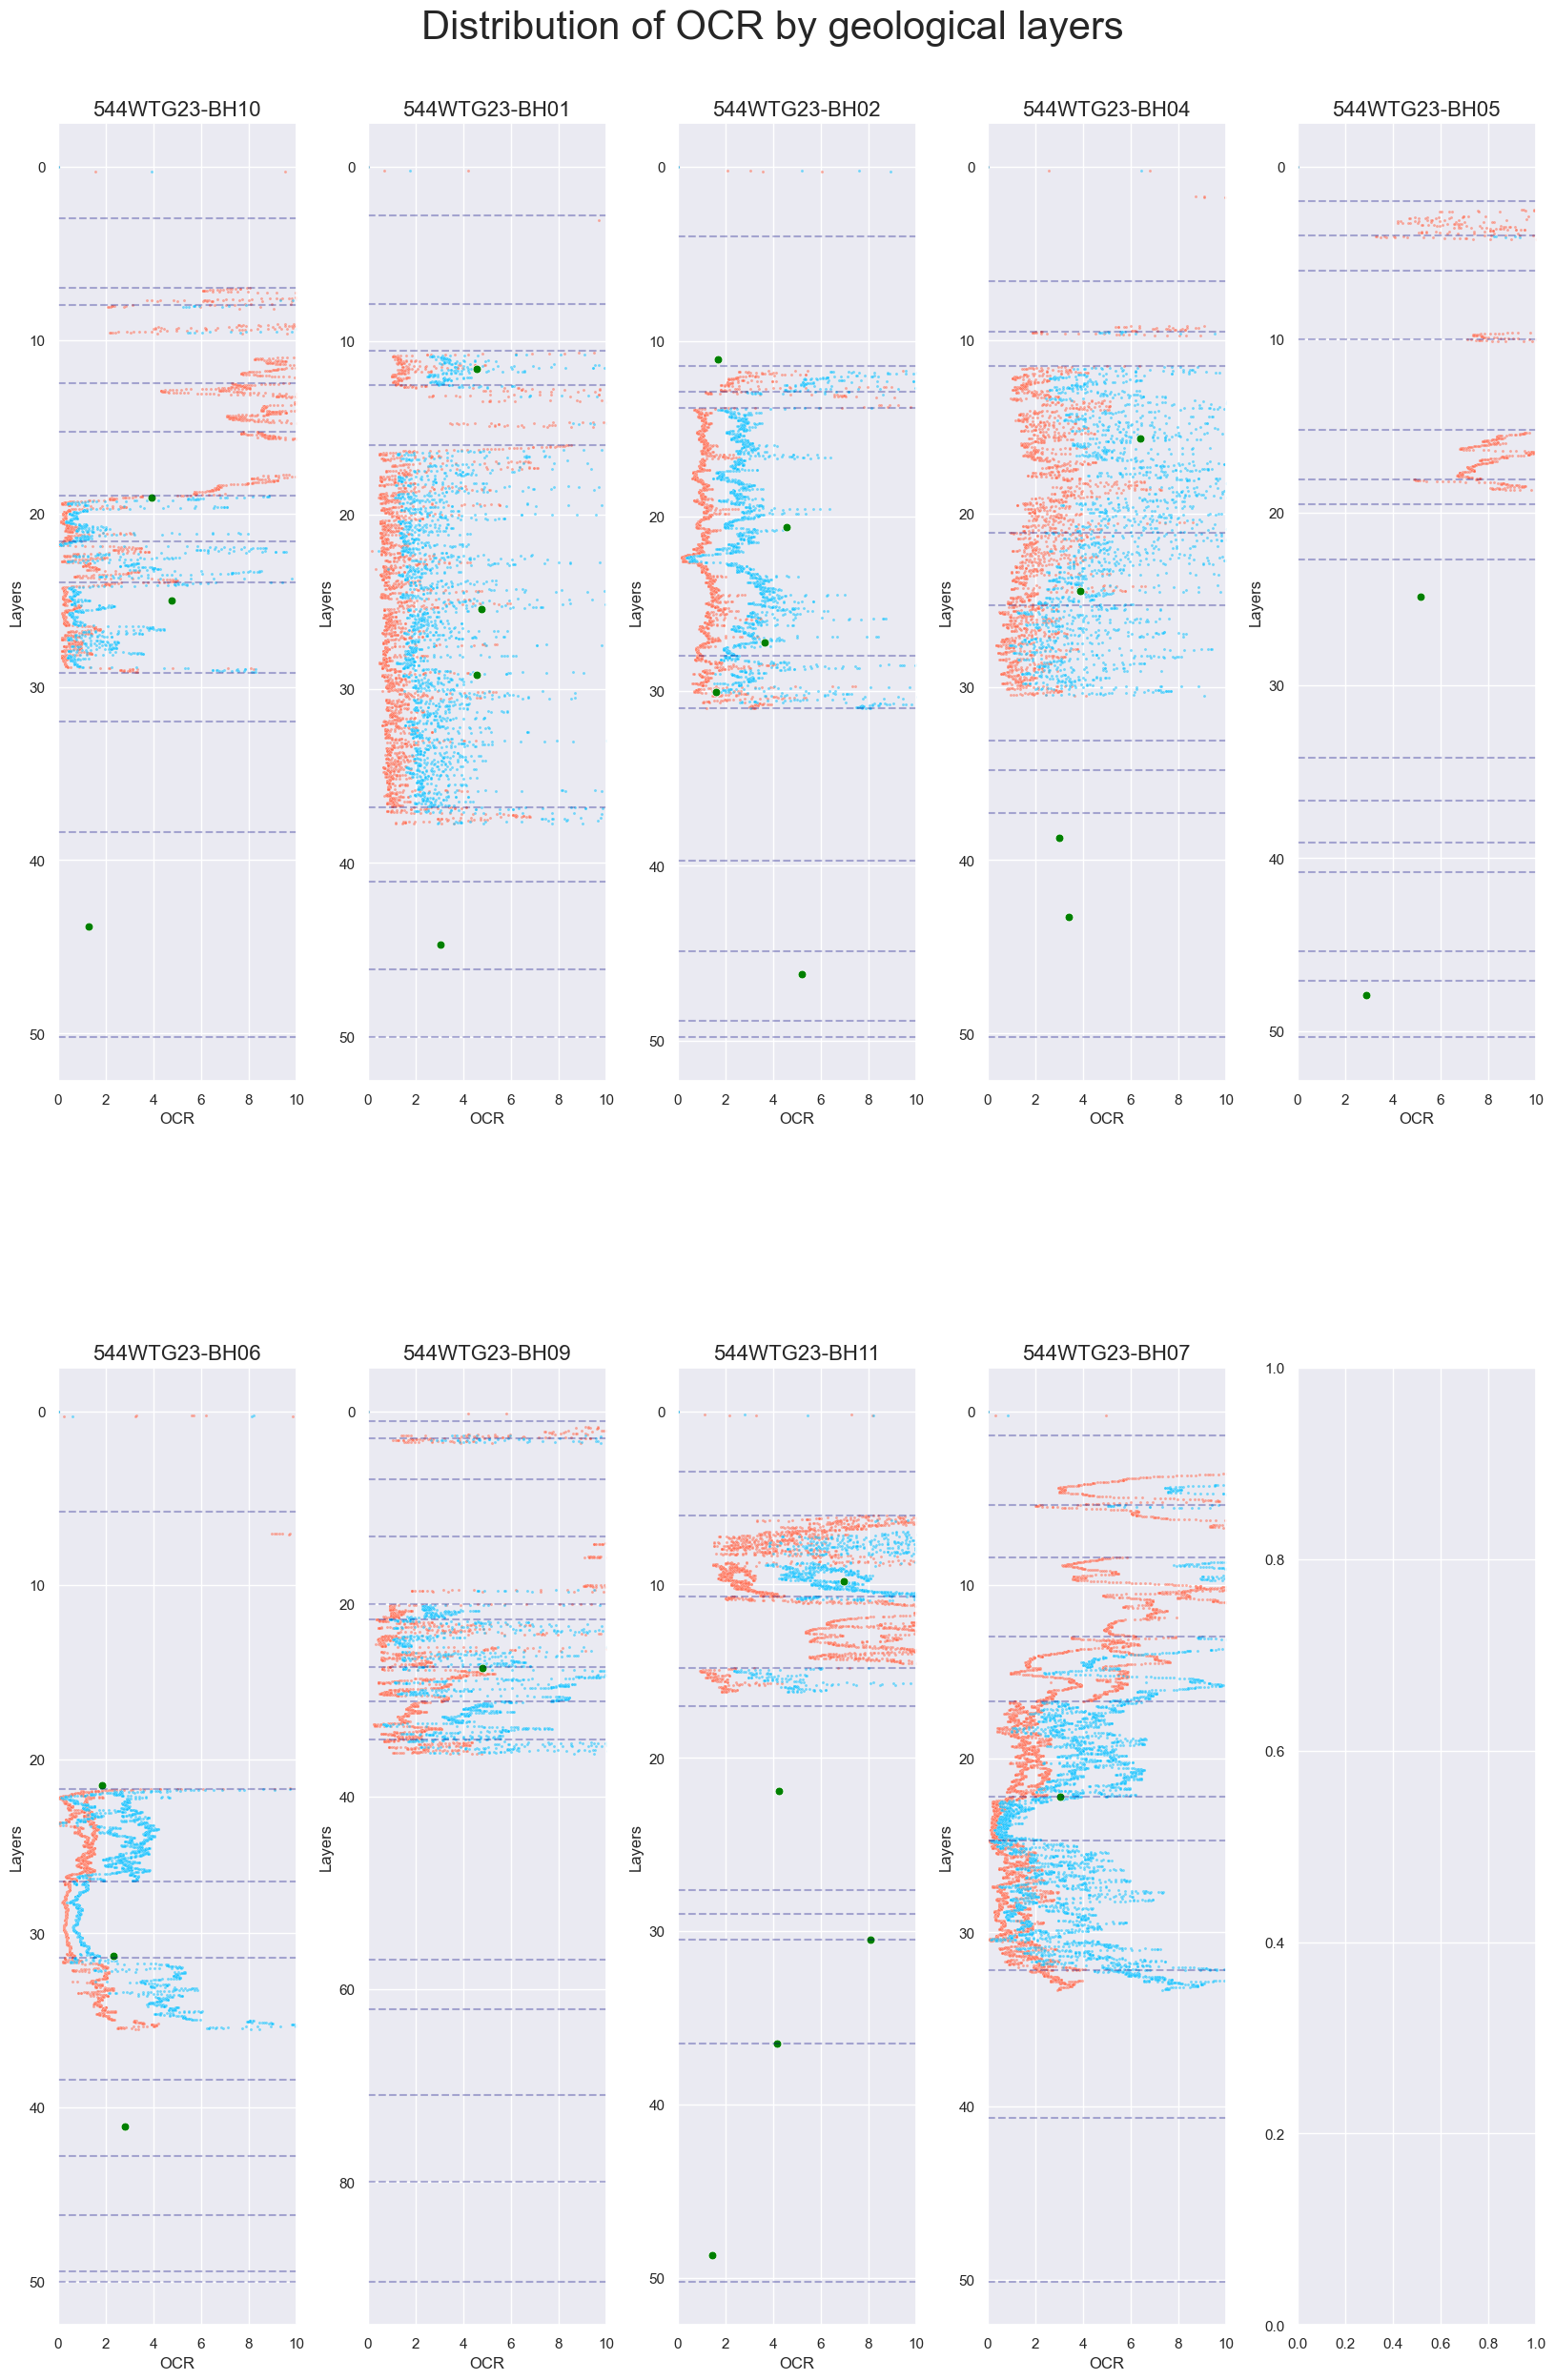

In [14]:
plot_df, cpt_param, parameter, param_df = cpt_df, "OCR Mayne", "OCR", ocr_df
xmin, xmax = 0, 10
###############################
borehole_list = plot_df["PointID"].unique()
bh = 0
fig, axes = plt.subplots(2, 5)
fig.suptitle(f'Distribution of {parameter} by geological layers', size=30, x=0.5, y=0.92)
fig.subplots_adjust(hspace=0.3, wspace=0.3)
sns.set(rc={"figure.figsize":(20, 30)})
sns.set(font_scale=1) 
for row in range(2):
    for col in range(5):
        if bh >= len(borehole_list):
            pass
        else:
            filtered_df = plot_df[plot_df["PointID"] == borehole_list[bh]]
            fsu_df = param_df[param_df["PointID"] == borehole_list[bh]]
            ax = sns.scatterplot(x=filtered_df["Qt (kPa)"]*0.2, y=filtered_df["Depth (m)"], alpha=0.5, ax=axes[row, col], s=5, color="tomato")
            ax = sns.scatterplot(x=filtered_df["Qt (kPa)"]*0.5, y=filtered_df["Depth (m)"], alpha=0.5, ax=axes[row, col], s=5, color="deepskyblue")
            ax = sns.scatterplot(data=fsu_df, x=parameter, y="Depth", alpha=1, ax=axes[row, col], s=40, color="green")
            # Plot geology
            bh_geo = geo_df[geo_df["PointID"] == borehole_list[bh]]
            for z in bh_geo["Depth"].to_list():
                ax = sns.lineplot(x=[xmin, xmax], y=[z, z], ax=axes[row, col], alpha=0.3, color="navy", linestyle='dashed')
            # Styles
            ax.set_title(borehole_list[bh], size=16)
            ax.set_ylabel("Layers")
            ax.set_xlabel("OCR")
            ax.invert_yaxis()
            ax.set_xlim(xmin, xmax)
            bh += 1

# Derive m factor

In [15]:
def find_k(cpt_df, bh, depth, ocr):
    df = cpt_df[cpt_df["PointID"] == bh]
    df = df[(df["Depth (m)"] < depth + 0.1) & (df["Depth (m)"] > depth - 0.1)]
    k = ocr/df["Qt (kPa)"].mean()
    return k

In [16]:
ocr_df["Derived k"] = ocr_df.apply(lambda x: find_k(cpt_df, x.PointID, x.Depth, x.OCR), axis=1)
ocr_df

,Unnamed: 0,raw PointID,PointID,Depth,In situ vertical effective stress,In situ vertical total stress,σ'v0 [kPa],Cc,Cr,OCR,Index,Derived k
0,0,544WTG23-BH08,544WTG23-BH08,8.00,85.000,595,76.000,0.526,0.069,2.701176,3,NaN
1,1,544WTG23-BH11,544WTG23-BH11,9.80,90.000,645,93.100,0.573,0.149,6.978912,3,0.544579
2,2,544WTG23-BH02,544WTG23-BH02,11.00,110.000,615,104.500,0.372,0.100,1.706727,2,0.006702
3,3,544WTG23-BH03a,544WTG23-BH03,11.00,95.000,650,104.500,0.424,0.078,8.044105,4,NaN
4,4,544WTG23-BH01A,544WTG23-BH01,11.60,110.000,645,110.200,0.388,0.066,4.562309,4,0.409159
5,5,544WTG23-BH04,544WTG23-BH04,15.70,145.000,750,149.150,0.319,0.053,6.411215,4,0.487159
6,6,544WTG23-BH10a,544WTG23-BH10,19.10,175.000,795,181.450,0.340,0.047,3.925515,7,0.280849
7,7,544WTG23-BH02,544WTG23-BH02,20.60,195.700,810,195.700,0.466,0.133,4.581656,5,1.064748
8,8,544WTG23-BH06,544WTG23-BH06,21.50,205.000,860,204.250,0.306,0.063,1.844537,2,0.014000
9,9,544WTG23-BH11a,544WTG23-BH11,21.90,195.000,885,208.050,0.615,0.166,4.243017,6,NaN


<Axes: xlabel='Derived k'>

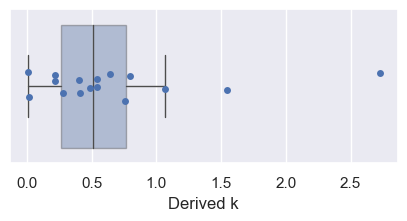

In [17]:
plot_df, param = ocr_df, "Derived k"
sns.set(rc={"figure.figsize":(5, 2)})
sns.boxplot(data=plot_df, x=param, boxprops=dict(alpha=.4), linewidth=1, showfliers= False)
sns.stripplot(data=plot_df, x=param, orient="h")

In [18]:
ocr_df["Derived k"].describe()

count    16.000000
mean      0.666130
std       0.673969
min       0.006702
25%       0.264680
50%       0.514059
75%       0.766493
max       2.725662
Name: Derived k, dtype: float64

In [19]:
ocr_df["Derived k"].median()

0.5140591213178375

In [12]:
cpt_df["OCR derived"] = cpt_df.apply(lambda x: calculate_ocr_mayne(x["Qt (kPa)"]), axis=1)
cpt_df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,PointID,CPT_hole,Depth (m),qc (MPa),fs (MPa),Inc. NS,Inc EW,...,qnet (kPa),Rf,Qt (kPa),Bq,Ic,Su,OCR Robertson,OCR Mayne,Su/σ'v,OCR derived
0,0,0,0,544WTG23-BH10,CPT10,0.00000,0.003214,0.0,-0.425142,0.372760,...,3.333897,0.0,0.000000,1.006624,0.0,-29.511864,0.0,0.0,-inf,0.0
1,1,1,1,544WTG23-BH10,CPT10,0.01000,0.003214,0.0,-1.389042,-0.696828,...,3.333897,0.0,-4635.044658,1.006405,0.0,-29.525234,0.0,0.0,-331.074618,0.0
2,2,2,2,544WTG23-BH10,CPT10,0.02000,0.003214,0.0,-0.095290,0.021505,...,3.333897,0.0,-2318.571779,1.006186,0.0,-29.538604,0.0,0.0,-165.612270,0.0
3,3,3,3,544WTG23-BH10,CPT10,0.03000,0.003214,0.0,-0.197911,0.881720,...,3.333897,0.0,-1546.414153,1.005968,0.0,-29.551974,0.0,0.0,-110.458154,0.0
4,4,4,4,544WTG23-BH10,CPT10,0.04000,0.003214,0.0,-0.535092,0.777778,...,3.333897,0.0,-1160.335340,1.005750,0.0,-29.565344,0.0,0.0,-82.881096,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39348,39348,46587,46587,544WTG23-BH11,CPT11,14.61024,45.343010,0.0,0.163881,-2.779262,...,43979.762200,0.0,139.983389,-0.171087,0.0,3079.435837,0.0,0.0,9.998814,0.0
39349,39349,46588,46588,544WTG23-BH11,CPT11,14.62024,45.557530,0.0,0.175762,-3.620167,...,45262.658200,0.0,144.104657,-0.045819,0.0,3171.057606,0.0,0.0,10.293190,0.0
39350,39350,46589,46589,544WTG23-BH11,CPT11,14.63024,51.760460,0.0,0.229843,-3.841083,...,51203.480000,0.0,163.338390,-0.066450,0.0,3595.388360,0.0,0.0,11.667028,0.0
39351,39351,46590,46590,544WTG23-BH11,CPT11,14.64024,37.670360,0.0,0.188463,-3.734188,...,37368.365600,0.0,118.407026,-0.056711,0.0,2607.152243,0.0,0.0,8.457645,0.0


In [21]:
#cpt_df.to_excel("data/cpt_parameter_derived.xlsx")

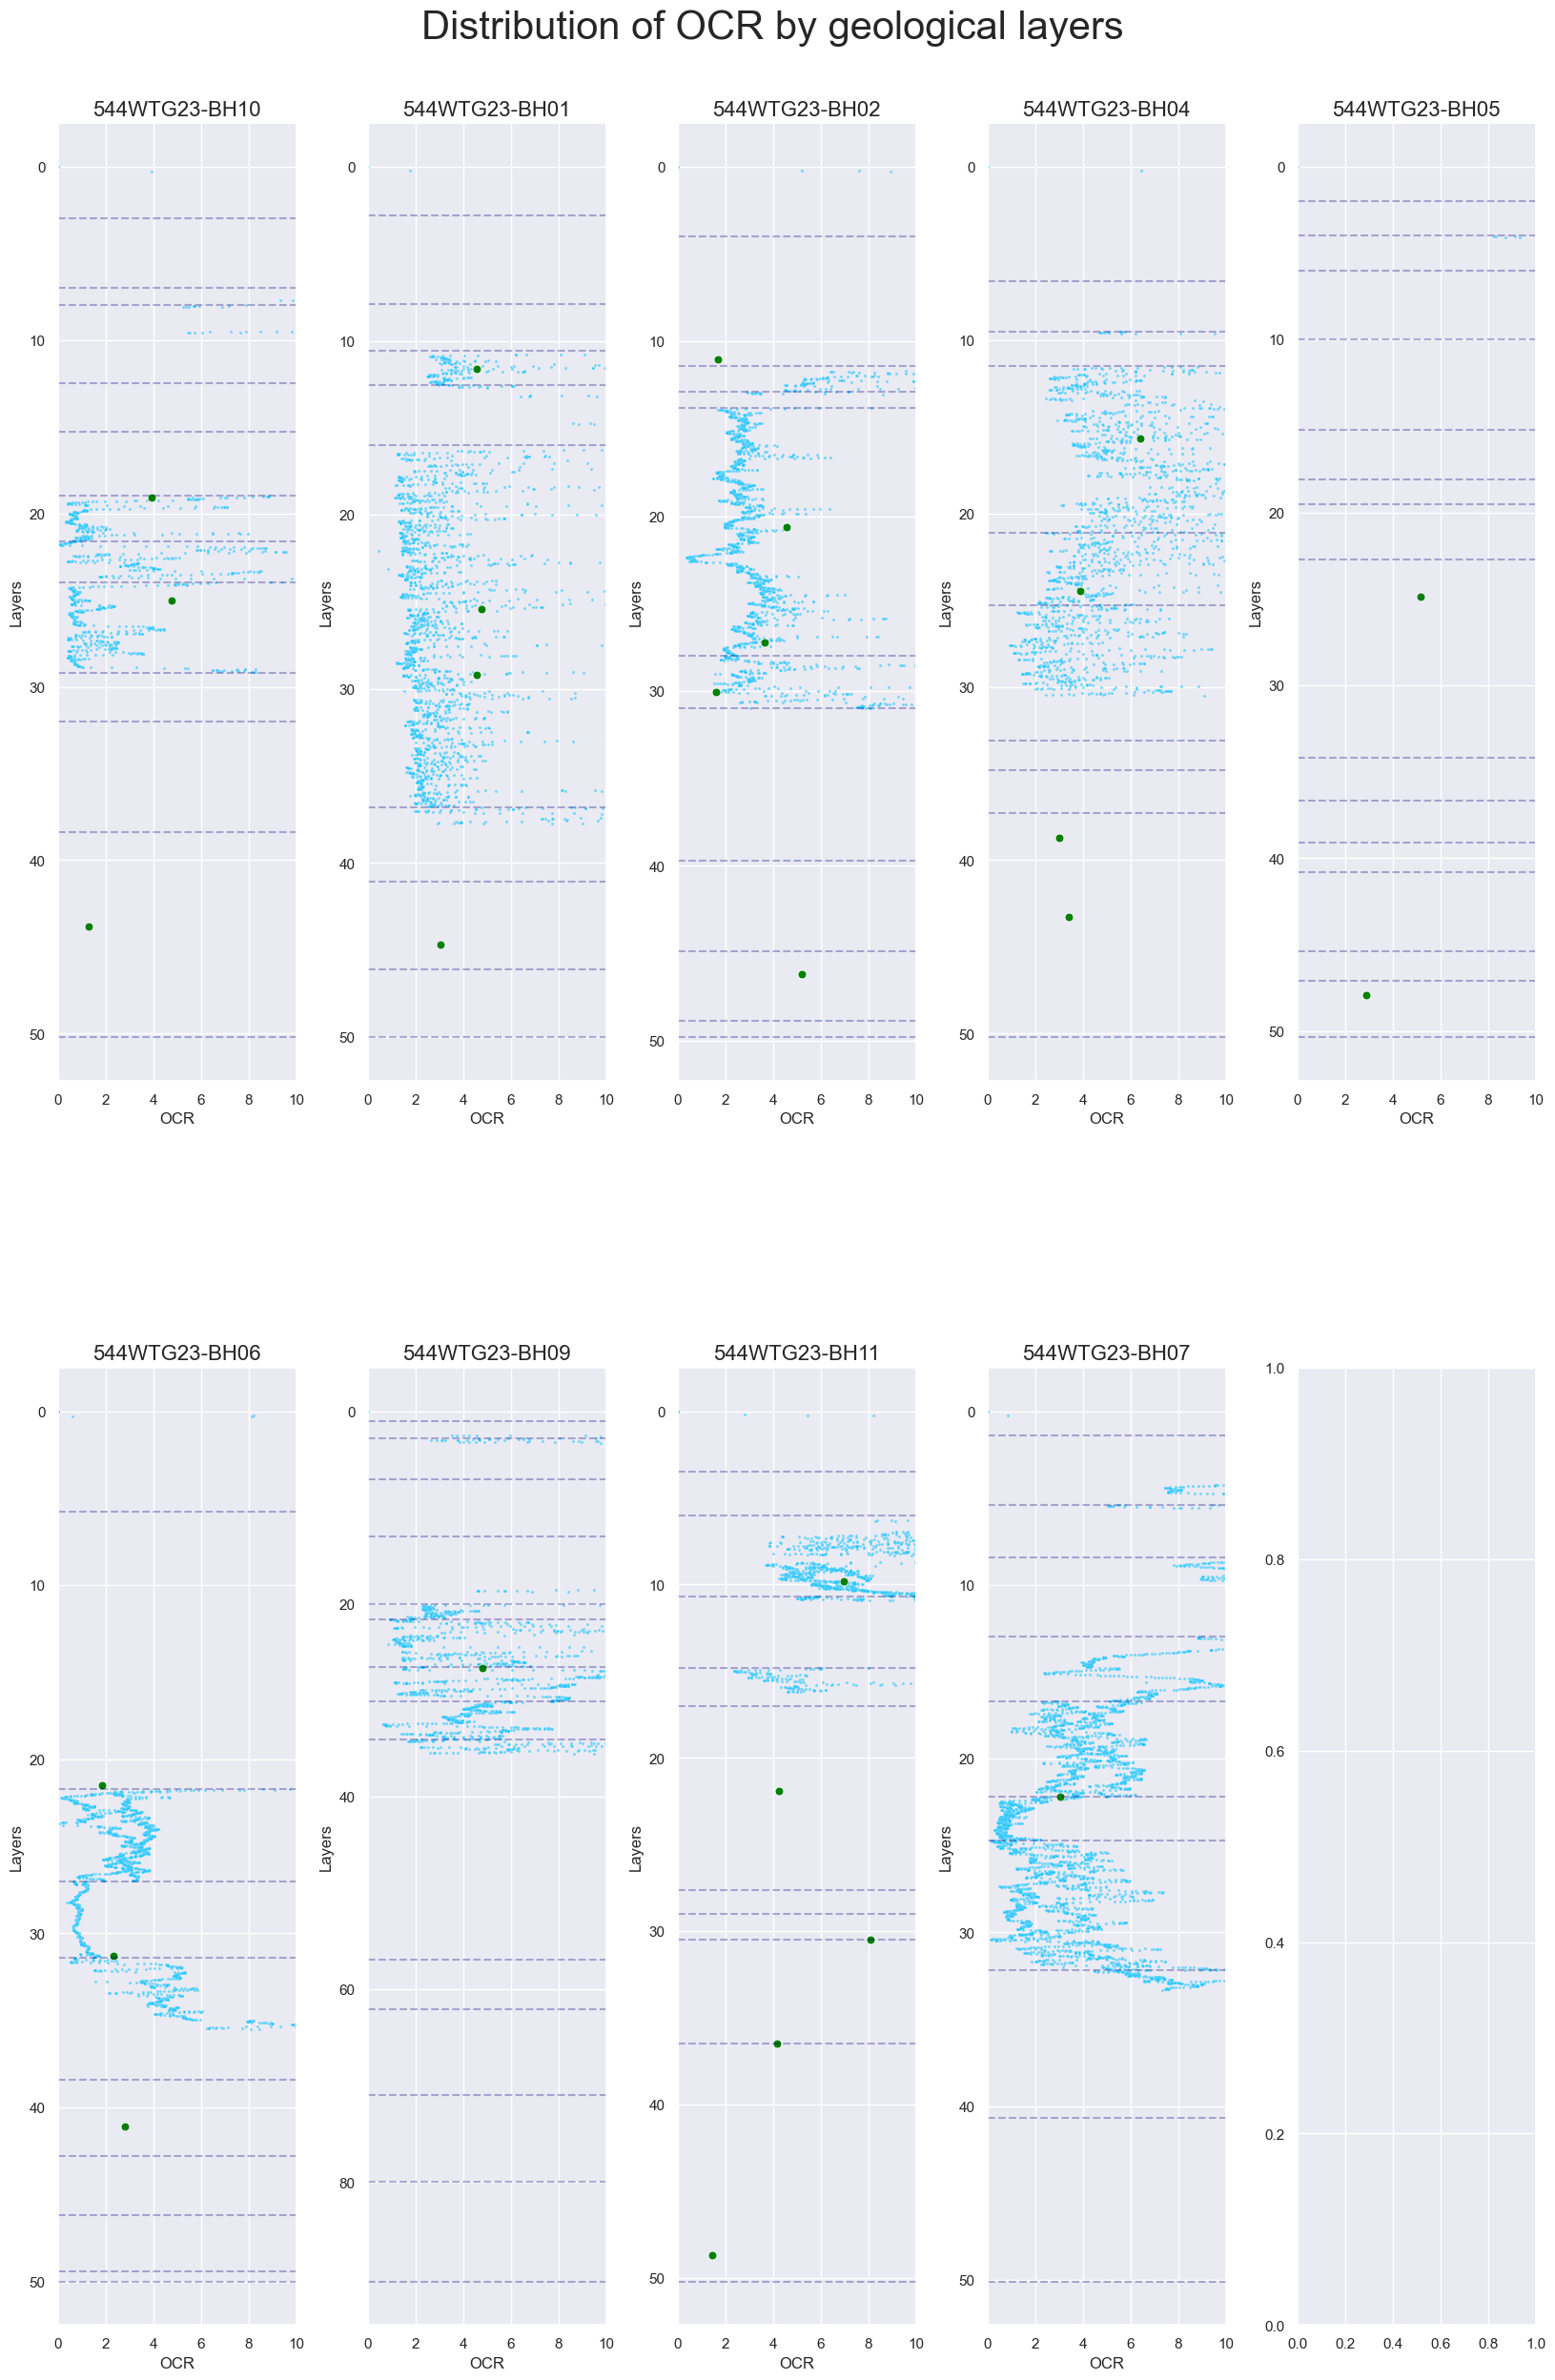

In [14]:
plot_df, cpt_param, parameter, param_df = cpt_df, "OCR Mayne", "OCR", ocr_df
xmin, xmax = 0, 10
###############################
borehole_list = plot_df["PointID"].unique()
bh = 0
fig, axes = plt.subplots(2, 5)
fig.suptitle(f'Distribution of {parameter} by geological layers', size=30, x=0.5, y=0.92)
fig.subplots_adjust(hspace=0.3, wspace=0.3)
sns.set(rc={"figure.figsize":(20, 30)})
sns.set(font_scale=1) 
for row in range(2):
    for col in range(5):
        if bh >= len(borehole_list):
            pass
        else:
            filtered_df = plot_df[plot_df["PointID"] == borehole_list[bh]]
            fsu_df = param_df[param_df["PointID"] == borehole_list[bh]]
            ax = sns.scatterplot(x=filtered_df["Qt (kPa)"]*0.5, y=filtered_df["Depth (m)"], alpha=0.5, ax=axes[row, col], s=5, color="deepskyblue")
            ax = sns.scatterplot(data=fsu_df, x=parameter, y="Depth", alpha=1, ax=axes[row, col], s=40, color="green")
            # Plot geology
            bh_geo = geo_df[geo_df["PointID"] == borehole_list[bh]]
            for z, geol in zip(bh_geo["Depth"].to_list(), bh_geo["Soil type"].to_list()):
                if geol == "01-CLAY" or geol == "02-SILT":
                    #ax = sns.lineplot(x=[xmin, xmax], y=[z, z], ax=axes[row, col], alpha=1, color="firebrick", linestyle='dashed')
                    ax = sns.lineplot(x=[xmin, xmax], y=[z, z], ax=axes[row, col], alpha=0.3, color="navy", linestyle='dashed')
                else:
                    ax = sns.lineplot(x=[xmin, xmax], y=[z, z], ax=axes[row, col], alpha=0.3, color="navy", linestyle='dashed')
            # Styles
            ax.set_title(borehole_list[bh], size=16)
            ax.set_ylabel("Layers")
            ax.set_xlabel("OCR")
            ax.invert_yaxis()
            ax.set_xlim(xmin, xmax)
            bh += 1

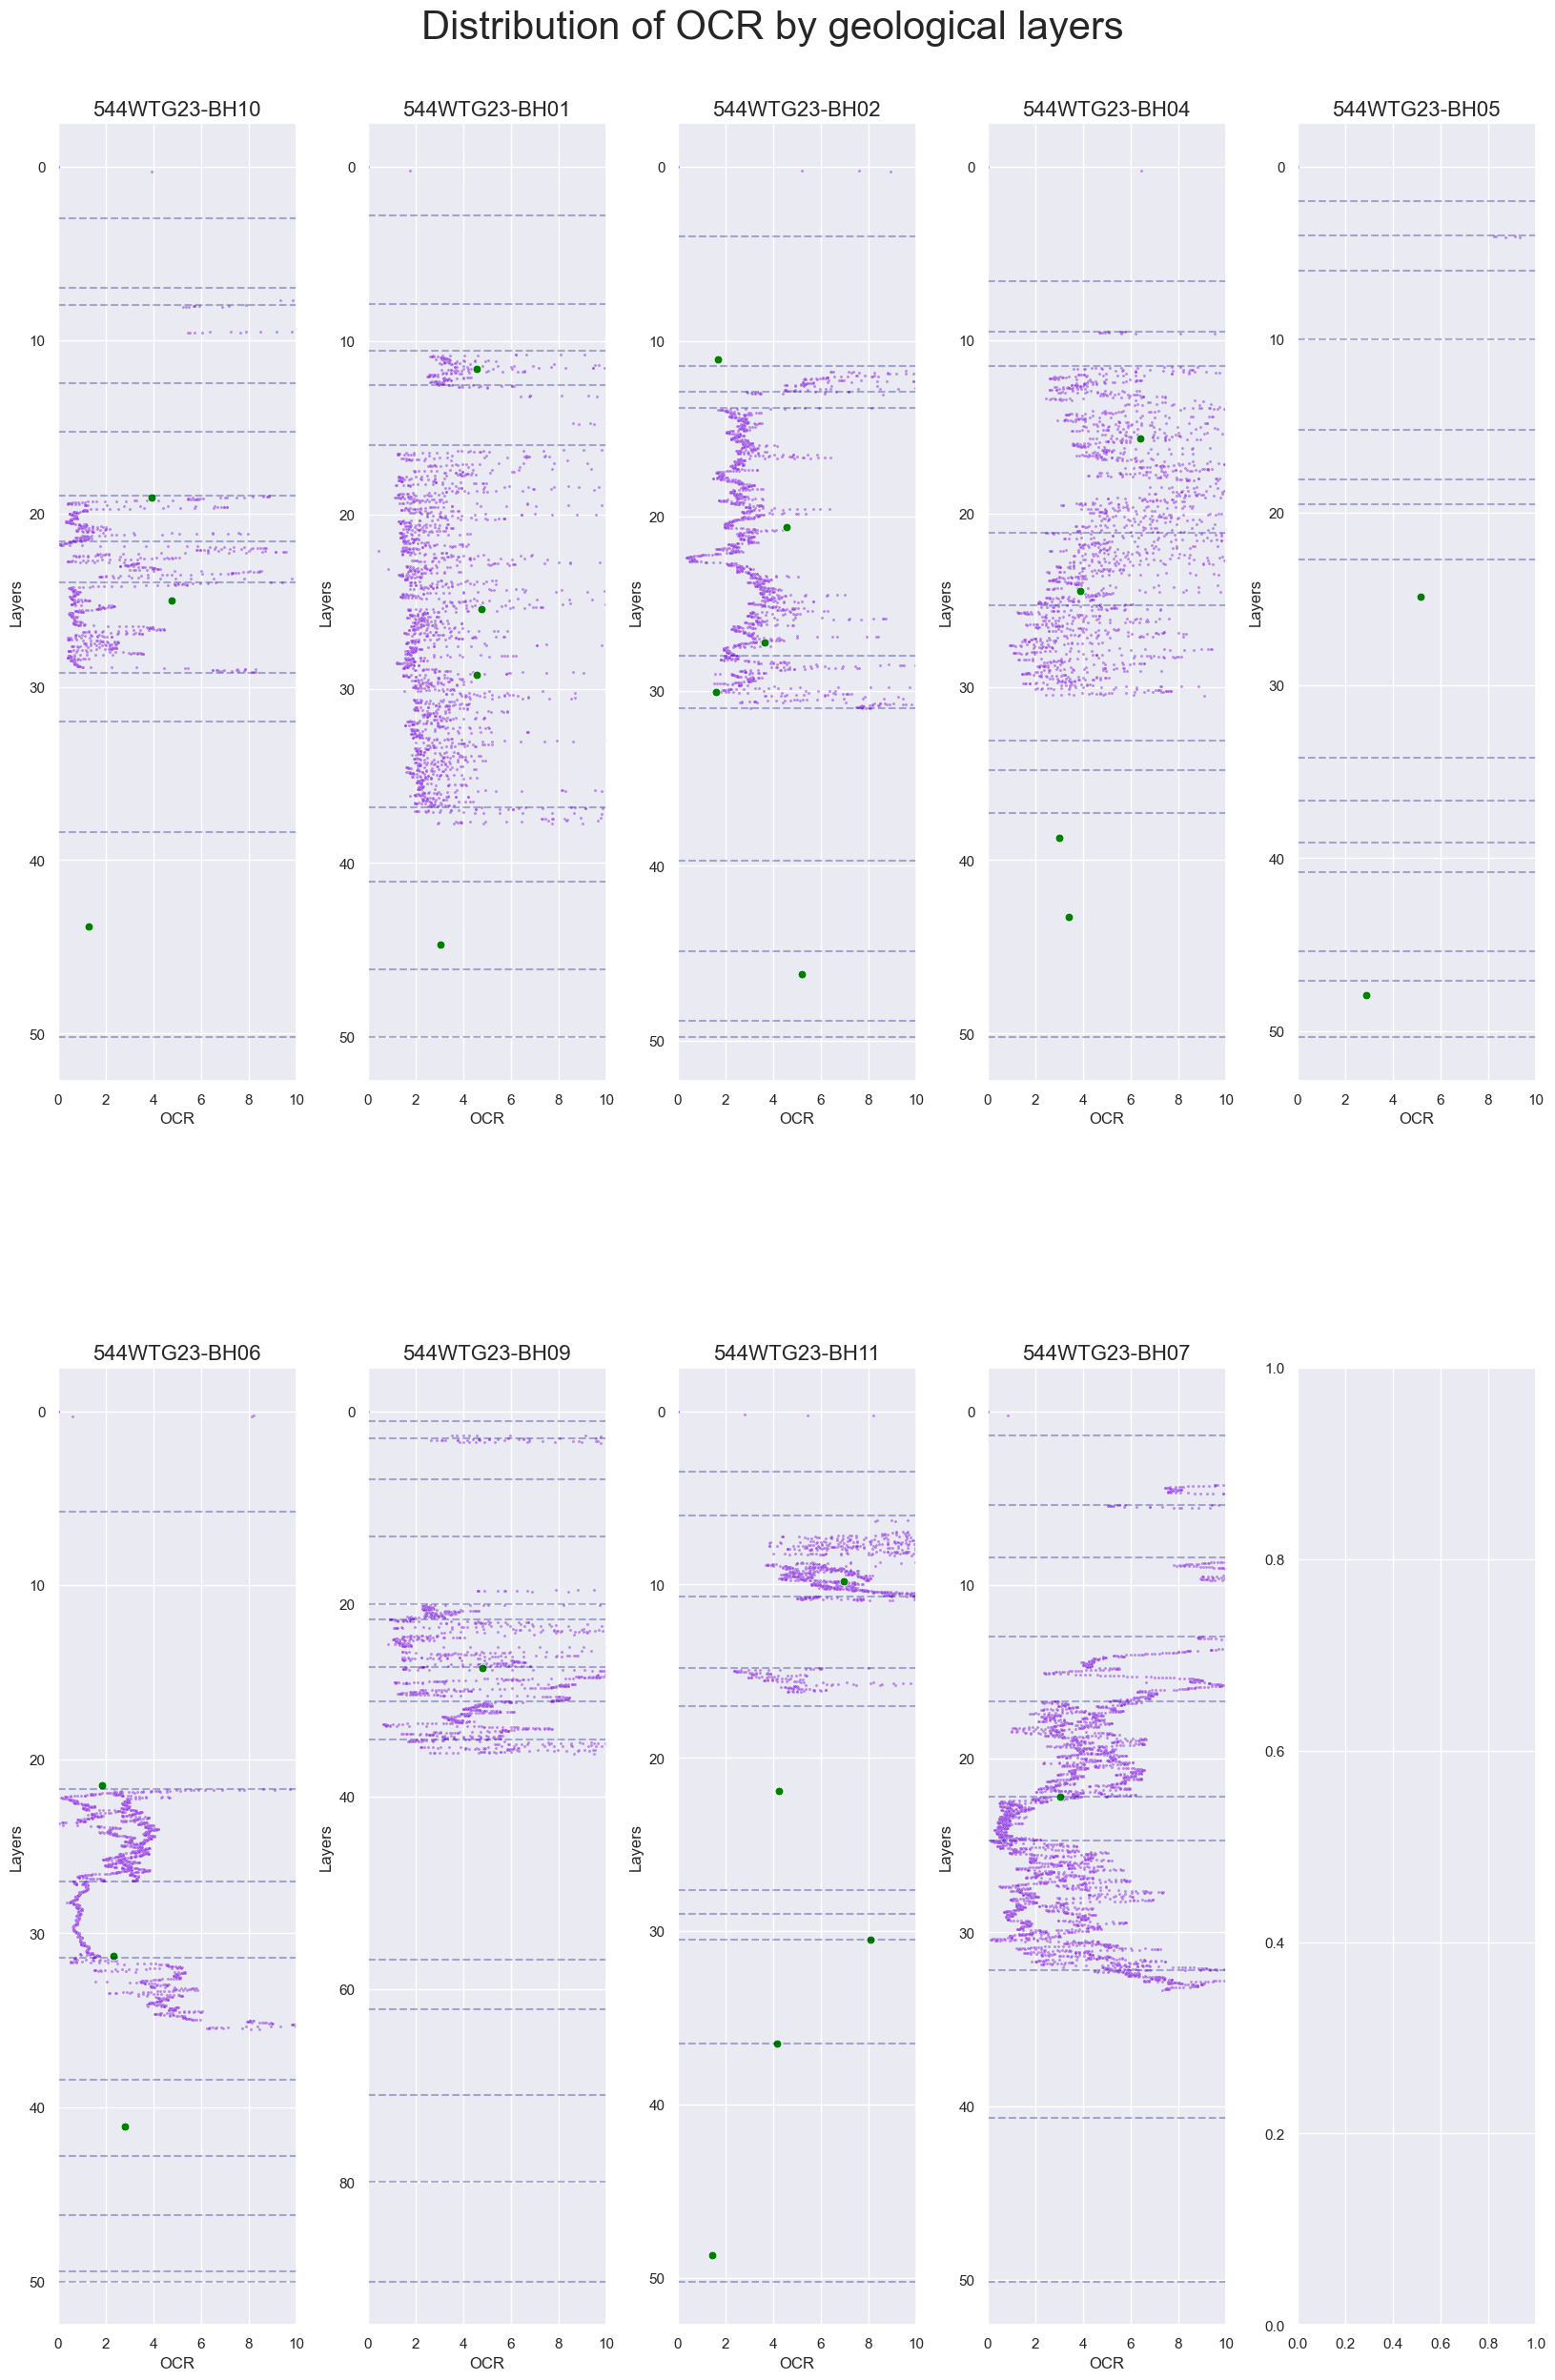

In [8]:
plot_df, cpt_param, parameter, param_df = cpt_df, "OCR Robertson", "OCR", ocr_df
xmin, xmax = 0, 10
###############################
borehole_list = plot_df["PointID"].unique()
bh = 0
fig, axes = plt.subplots(2, 5)
fig.suptitle(f'Distribution of {parameter} by geological layers', size=30, x=0.5, y=0.92)
fig.subplots_adjust(hspace=0.3, wspace=0.3)
sns.set(rc={"figure.figsize":(20, 30)})
sns.set(font_scale=1) 
for row in range(2):
    for col in range(5):
        if bh >= len(borehole_list):
            pass
        else:
            filtered_df = plot_df[plot_df["PointID"] == borehole_list[bh]]
            fsu_df = param_df[param_df["PointID"] == borehole_list[bh]]
            ax = sns.scatterplot(x=filtered_df["Qt (kPa)"]*0.5, y=filtered_df["Depth (m)"], alpha=0.5, ax=axes[row, col], s=5, color="blueviolet")
            ax = sns.scatterplot(data=fsu_df, x=parameter, y="Depth", alpha=1, ax=axes[row, col], s=40, color="green")
            # Plot geology
            bh_geo = geo_df[geo_df["PointID"] == borehole_list[bh]]
            for z, geol in zip(bh_geo["Depth"].to_list(), bh_geo["Soil type"].to_list()):
                if geol == "01-CLAY" or geol == "02-SILT":
                    #ax = sns.lineplot(x=[xmin, xmax], y=[z, z], ax=axes[row, col], alpha=1, color="firebrick", linestyle='dashed')
                    ax = sns.lineplot(x=[xmin, xmax], y=[z, z], ax=axes[row, col], alpha=0.3, color="navy", linestyle='dashed')
                else:
                    ax = sns.lineplot(x=[xmin, xmax], y=[z, z], ax=axes[row, col], alpha=0.3, color="navy", linestyle='dashed')
            # Styles
            ax.set_title(borehole_list[bh], size=16)
            ax.set_ylabel("Layers")
            ax.set_xlabel("OCR")
            ax.invert_yaxis()
            ax.set_xlim(xmin, xmax)
            bh += 1